In [22]:
import torch
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
from models import Generator
from PIL import Image, ImageDraw
from dataset import Image_Transformer
import numpy as np

In [8]:
generator = Generator(in_channels=3, features=64)
generator_state_dict = torch.load('./resultados/generator.pt', map_location=torch.device('cpu'))
print (generator.load_state_dict(generator_state_dict))

<All keys matched successfully>


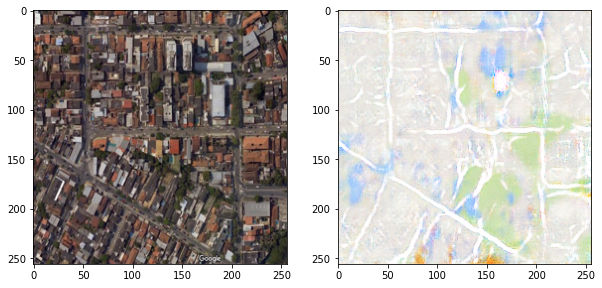

In [27]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])
inv_transformer = Image_Transformer(256)['inv']
img_pil = Image.open('./resultados/img_test_1.png').convert('RGB').resize((256, 256))
img_tensor = transformer(img_pil).unsqueeze_(0)

img_pred = generator(img_tensor)
img_pil_pred = inv_transformer(img_pred[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_pil)
plt.subplot(1, 2, 2)
plt.imshow(img_pil_pred)
plt.show()